# Convolutional Autoencoder for Noise Removal in MNIST dataset

The MNIST dataset with 60000 images of handwritten digits is used to train a convolutional autoencoder to produce a clear image given a noisy image. Gaussian noise is added to the images in the dataset. Input to the encoder are the noisy images while the decoder is trained to produce a noiseless image. 

The neural network uses the Adam optimzer, binary crossentropy loss function and accuracy is taken as the metric.

Images are 28 x 28. 

Number of epochs: 

Obtained Accuracy:

Using TensorFlow backend.


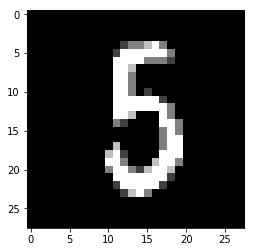

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[5678],cmap='gray')
Xme=X_train

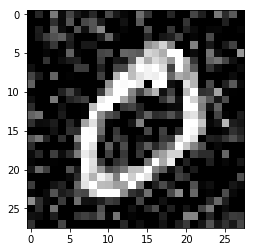

In [2]:
X_train=Xme
stddev=60
mean=0
X_train= X_train.astype('float32')
X_train /= 255.
n_imgs = X_train.shape[0] 
n_rows = X_train.shape[1]
n_cols = X_train.shape[2]
noise = np.random.normal(mean,stddev/255.,(n_imgs,n_rows, n_cols))
noisy = X_train + noise
noisy = np.clip(noisy, 0., 1.)
plt.imshow(noisy[1],cmap="gray")

In [3]:
Xtest=X_test
Xtest= Xtest.astype('float32')
Xtest /= 255.
n_imgs = Xtest.shape[0] 
n_rows = Xtest.shape[1]
n_cols = Xtest.shape[2]
noisetest = np.random.normal(mean,stddev/255.,(n_imgs,n_rows, n_cols))
Xtest=np.reshape(Xtest,[10000,28,28])
Xtest = Xtest + noisetest
Xtest = np.clip(Xtest, 0., 1.)
Xtest=np.reshape(Xtest,[10000,28,28,1])

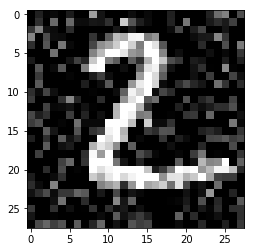

In [4]:
plt.imshow(Xtest[1].reshape(28,28),cmap="gray")

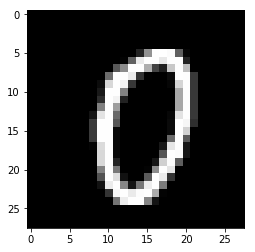

In [33]:
plt.imshow(X_train[1000],cmap='gray')

In [5]:
from keras.utils import to_categorical
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
noisy=noisy.reshape(60000,28,28,1)
print(y_train[0])
print(X_train.shape)
print(noisy.shape)
print(X_test.shape)
print(y_test.shape)

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
(60000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 10)


In [55]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, GlobalAveragePooling2D,Reshape
from keras.layers import Flatten, Dense,UpSampling2D

model = Sequential()

#Encoder
model.add(Convolution2D(32, (2, 2), input_shape=(28,28,1),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
#model.add(MaxPooling2D(1))
model.add(Dropout(0.2))

model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
#model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

#Decoder

#model.add(UpSampling2D(size=(7,7)))
#model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
#model.add(Dropout(0.1))

model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(32,(2, 2),activation='relu', padding="same"))
model.add(Dropout(0.2))

model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
model.add(Dropout(0.2))

model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
model.add(Dropout(0.2))

model.add(Dense(1,activation="sigmoid"))
model.add(Dropout(0.2))

          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_91 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_92 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 7, 7, 8)           520       
__________

In [56]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
X=np.reshape(X_train,[60000,28,28,1])
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
hist = model.fit(noisy,X_train, validation_split = 0.2, epochs = 2, batch_size=256, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 576s 12ms/step - loss: 0.7693 - acc: 0.7467 - val_loss: 0.2452 - val_acc: 0.8093
Epoch 2/2
48000/48000 [==============================] - 431s 9ms/step - loss: 0.6038 - acc: 0.7919 - val_loss: 0.1840 - val_acc: 0.8022


In [61]:
hist = model.fit(noisy,X_train, validation_split = 0.2, epochs = 20, batch_size=256, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 372s 8ms/step - loss: 0.5776 - acc: 0.7912 - val_loss: 0.1775 - val_acc: 0.8008
Epoch 2/20
48000/48000 [==============================] - 622s 13ms/step - loss: 0.5728 - acc: 0.7933 - val_loss: 0.1733 - val_acc: 0.8043
Epoch 3/20
48000/48000 [==============================] - 592s 12ms/step - loss: 0.5684 - acc: 0.7945 - val_loss: 0.1703 - val_acc: 0.8067
Epoch 4/20
48000/48000 [==============================] - 538s 11ms/step - loss: 0.5656 - acc: 0.7953 - val_loss: 0.1670 - val_acc: 0.8065
Epoch 5/20
48000/48000 [==============================] - 541s 11ms/step - loss: 0.5639 - acc: 0.7969 - val_loss: 0.1626 - val_acc: 0.8069
Epoch 6/20
48000/48000 [==============================] - 537s 11ms/step - loss: 0.5610 - acc: 0.7987 - val_loss: 0.1580 - val_acc: 0.8086
Epoch 7/20
48000/48000 [==============================] - 541s 11ms/step - loss: 0.5588 - acc: 0.8000 - val_loss: 0.1

In [7]:
hist = model.fit(noisy,X_train, validation_split = 0.2, epochs = 2, batch_size=256, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 316s 7ms/step - loss: 0.5484 - acc: 0.8035 - val_loss: 0.1457 - val_acc: 0.8112
Epoch 2/2
48000/48000 [==============================] - 296s 6ms/step - loss: 0.5478 - acc: 0.8036 - val_loss: 0.1447 - val_acc: 0.8112


In [8]:
hist = model.fit(noisy,X_train, validation_split = 0.2, epochs = 6, batch_size=256, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 332s 7ms/step - loss: 0.5477 - acc: 0.8037 - val_loss: 0.1454 - val_acc: 0.8114
Epoch 2/6
48000/48000 [==============================] - 319s 7ms/step - loss: 0.5470 - acc: 0.8038 - val_loss: 0.1448 - val_acc: 0.8115
Epoch 3/6
48000/48000 [==============================] - 349s 7ms/step - loss: 0.5466 - acc: 0.8038 - val_loss: 0.1444 - val_acc: 0.8114
Epoch 4/6
48000/48000 [==============================] - 468s 10ms/step - loss: 0.5468 - acc: 0.8039 - val_loss: 0.1444 - val_acc: 0.8114
Epoch 5/6
48000/48000 [==============================] - 527s 11ms/step - loss: 0.5462 - acc: 0.8039 - val_loss: 0.1448 - val_acc: 0.8115
Epoch 6/6
48000/48000 [==============================] - 519s 11ms/step - loss: 0.5463 - acc: 0.8039 - val_loss: 0.1441 - val_acc: 0.8114


In [40]:
hist = model.fit(noisy,X_train, validation_split = 0.2, epochs = 20, batch_size=256, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 490s 10ms/step - loss: 0.5468 - acc: 0.8038 - val_loss: 0.1497 - val_acc: 0.8102
Epoch 2/20
48000/48000 [==============================] - 399s 8ms/step - loss: 0.5478 - acc: 0.8034 - val_loss: 0.1447 - val_acc: 0.8114
Epoch 3/20
48000/48000 [==============================] - 523s 11ms/step - loss: 0.5465 - acc: 0.8039 - val_loss: 0.1436 - val_acc: 0.8114
Epoch 4/20
48000/48000 [==============================] - 525s 11ms/step - loss: 0.5457 - acc: 0.8040 - val_loss: 0.1440 - val_acc: 0.8116
Epoch 5/20
48000/48000 [==============================] - 516s 11ms/step - loss: 0.5458 - acc: 0.8041 - val_loss: 0.1434 - val_acc: 0.8116
Epoch 6/20
48000/48000 [==============================] - 520s 11ms/step - loss: 0.5447 - acc: 0.8042 - val_loss: 0.1434 - val_acc: 0.8116
Epoch 7/20
48000/48000 [==============================] - 515s 11ms/step - loss: 0.5451 - acc: 0.8041 - val_loss: 0.1

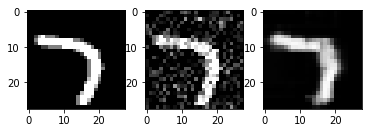

In [137]:
index=60
x1=np.reshape(Xtest[index],[1,28,28,1])
y1=model.predict(x1)
y1=np.reshape(y1,[28,28])
f = plt.figure()
f.add_subplot(1,3, 1)
plt.imshow(np.reshape(X_test[index],[28,28]),cmap="gray")
f.add_subplot(1,3, 2)
plt.imreshape(x1,[28,28]),cmap="gray")
f.add_subplot(1,3, 3)
plt.imshow(y1,cmap="gray")

In [138]:
model.save('model_conv_ae.h5')

In [6]:
from keras.models import load_model
import tensorflow
from tensorflow.losses import sigmoid_cross_entropy
model = load_model('model_conv_ae.h5')

In [44]:
print(noisy[0])

[[[  3.42325579e-02]
  [  8.36885127e-02]
  [  1.18105348e-02]
  [  5.07709693e-01]
  [  0.00000000e+00]
  [  2.93763565e-02]
  [  0.00000000e+00]
  [  1.56111047e-01]
  [  0.00000000e+00]
  [  1.60384804e-01]
  [  1.93589768e-01]
  [  7.24280218e-02]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  1.05865884e-01]
  [  1.48902085e-01]
  [  6.12507337e-02]
  [  2.08630551e-01]
  [  0.00000000e+00]
  [  1.23735274e-01]
  [  0.00000000e+00]
  [  1.08887365e-01]
  [  1.15751742e-01]
  [  8.59368909e-03]
  [  0.00000000e+00]
  [  2.23931115e-01]
  [  0.00000000e+00]
  [  5.69864809e-02]]

 [[  0.00000000e+00]
  [  1.54578457e-01]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  3.56914374e-01]
  [  1.80777547e-01]
  [  1.83258023e-01]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  3.80113965e-01]
  [  3.27630101e-01]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  2.96242501e-01]
  [  1.62965122e-01]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.0000

In [ ]:
#1- loss: 7232.5270 - acc: 0.1627 - val_loss: 7156.8898 - val_acc: 0.2748
#2- loss: 7232.3357 - acc: 0.1621 - val_loss: 7156.8873 - val_acc: 0.2756
#5- loss: 7232.0133 - acc: 0.5477 - val_loss: 7156.5693 - val_acc: 0.5620
#6- loss: 7231.9352 - acc: 0.6181 - val_loss: 7156.5233 - val_acc: 0.6110
#11- loss: 7231.8783 - acc: 0.6605 - val_loss: 7156.5015 - val_acc: 0.6331
#16- loss: 7231.8616 - acc: 0.6683 - val_loss: 7156.4924 - val_acc: 0.6448
#21- loss: 7231.8219 - acc: 0.6761 - val_loss: 7156.4767 - val_acc: 0.6594
#26- loss: 7231.7909 - acc: 0.6878 - val_loss: 7156.4628 - val_acc: 0.6733
#31- loss: 7231.7895 - acc: 0.6982 - val_loss: 7156.4477 - val_acc: 0.6911 
#36- loss: 7231.7772 - acc: 0.7033 - val_loss: 7156.4406 - val_acc: 0.6935
#41- loss: 7231.7705 - acc: 0.7064 - val_loss: 7156.4391 - val_acc: 0.6925